<a href="https://colab.research.google.com/github/Shubham-Patel22/JustWatch-Web-Scraping/blob/main/Numerical_Programming_in_Python_JustWatch_Web_Scraping_my_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Analysis**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import datetime

## **Scrapping Movies Data**

In [ ]:
# This function will be used to fetch the soup that will then be used to extract further data.
#def fetch_movie_urls(url):

# I'm giving it a more sensible and coherent name
def fetch_soup(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36'
    }
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        return "Failed to retrieve the page, status code:", response.status_code
    soup = BeautifulSoup(response.text, 'html.parser')
    return soup


In [ ]:
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'
soup = fetch_soup(url)
print(soup.prettify())

# find all a tags with links
links = soup.find_all('a', href=True)

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

In [ ]:
# Use list comprehension, getting all links that contain '/movie/'
movie_urls = ['https://www.justwatch.com' + link['href'] for link in links if '/movie/' in link['href']]

In [ ]:
movie_urls

['https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/deadpool-3',
 'https://www.justwatch.com/in/movie/tumbbad',
 'https://www.justwatch.com/in/movie/kill-2024',
 'https://www.justwatch.com/in/movie/thalapathy-68',
 'https://www.justwatch.com/in/movie/stree',
 'https://www.justwatch.com/in/movie/saripodhaa-sanivaaram',
 'https://www.justwatch.com/in/movie/thangalaan',
 'https://www.justwatch.com/in/movie/sector-36',
 'https://www.justwatch.com/in/movie/khel-khel-mein',
 'https://www.justwatch.com/in/movie/vedaa',
 'https://www.justwatch.com/in/movie/ntr-30',
 'https://www.justwatch.com/in/movie/inside-out-2',
 'https://www.justwatch.com/in/movie/munjha',
 'https://www.justwatch.com/in/movie/siddharth-roy',
 'https://www.justwatch.com/in/movie/ulajh',
 'https://www.justwatch.com/in/movie/the-substance',
 'https://www.justwatch.com/in/movie/vaazha',
 'https://www.justwatch.com/in/movie/mathu-vadalara',
 'https://www.justwatch.com/in/movie/untitled-vicky-kau

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
# getting soups for all movie links. It will be useful later.
movie_soups = [fetch_soup(url) for url in movie_urls]

In [ ]:
len(movie_soups)

110

In [ ]:
print(movie_soups[0].prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="yes" data-vue-meta="ssr" name="mobile-web-app-capable"/>
  <meta content="yes" data-vue-meta="ssr" name="apple-mobile-web-app-capable"/>
  <meta content="#182531" data-vue-meta="ssr" name="theme-color"/>
  <meta content="AkO0-dINGfhSod2X6LeYIp9hwZc8ShczjzJA2a47dME" data-vue-meta

***rough work that I used for developing my code in this notebook.***

In [ ]:
movie_soups[0].find('h1')

<h1 class="title-detail-hero__details__title" data-v-0b912180=""> Stree 2: Sarkate Ka Aatank <span class="release-year" data-v-0b912180="">(2024)</span></h1>

In [ ]:
movie_soups[0].find('h1').text

' Stree 2: Sarkate Ka Aatank (2024)'

In [ ]:
movie_soups[0].find('h1').find('span').text

'(2024)'

In [ ]:
movie_soups[0].find_all('h3')[1].find_next('div').text

'Comedy, Horror'

In [ ]:
movie_soups[0].find_all('h3')

[<h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Rating</h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Genres</h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Runtime</h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Age rating</h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="" style="max-width: fit-content"> Production country </h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Director</h3>,
 <h3 dir="ltr">What will happen in Stree 2? </h3>,
 <h3 dir="ltr">Is Roohi a part of the Stree franchise? </h3>,
 <h3 dir="ltr">Where can I watch Stree 2?</h3>,
 <h3 dir="ltr">Are Stree 2 and Bhediya related? </h3>,
 <h3 dir="ltr">Is Stree 2 the last movie in the Stree franchise? </h3>,
 <h3 class="detail-infos__subheading--label"> Cast </h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Rating</h3>,
 <h3 class="detail-infos__subheading" data-v-f2f7b7b6="">Genres</h3>,
 <h3 class="detail-infos__subheading" data

In [ ]:
movie_soups[0].find_all('span')

[<span class="freemium-filter__badge freemium-filter__badge--sm" style="display:none;"><svg aria-hidden="true" class="svg-inline--fa fa-jw-crown-icon fa-sm" data-icon="jw-crown-icon" data-prefix="fas" focusable="false" role="img" viewbox="0 0 512 512" xmlns="http://www.w3.org/2000/svg"><path d="M59.541 120.267l93.856 82.583L230.97 56.853c4.744-5.83 11.237-16.399 25.447-16.399 14.21 0 23.084 10.467 27.7 16.4l71.296 145.972 96.89-83.767a24.666 24.666 0 0140.527 22.2l-36.894 254.488a.856.856 0 01-.847.734H57.148a.856.856 0 01-.847-.731L18.84 142.418a24.666 24.666 0 0140.7-22.15zm-.719 300.88h393.683c.27 0 .49.22.49.49v24.177c0 13.623-11.044 24.666-24.667 24.666H82.999c-13.623 0-24.666-11.043-24.666-24.666v-24.177c0-.27.219-.49.49-.49z" fill="currentColor"></path></svg> PRO </span>,
 <span class="navbar__button__link__item">Home</span>,
 <span class="navbar__button__link__item">New</span>,
 <span class="navbar__button__link__item">Popular</span>,
 <span class="navbar__button navbar__button

In [ ]:
movie_soups[0].select('span.imdb-score')[0].text

'7.2 (30k)'

In [ ]:
for element in movie_soups[0].find_all('h3'):
    if element.text.strip() == 'Rating':
        print(element.find_next('div').find('div').text.strip())
        break

7.2  (30k)62%


In [ ]:
movie_soups[0].find_all('div', class_='title-detail-hero-details__item')[-2].text

' UA Age rating'

In [ ]:
print(movie_soups[0].find('div', class_='buybox').prettify())

<div class="buybox" data-v-0320baaa="" data-v-4f6c4a1e="">
 <!-- -->
 <!-- -->
 <span class="offer-container" data-v-0320baaa="" data-v-c137d278="">
  <!-- -->
  <a class="offer" data-v-c137d278="" href="https://e.justwatch.com/a?uct_web_app_version=3.9.0-webapp%234b63b45&amp;r=https%3A%2F%2Fapp.primevideo.com%2Fdetail%3Fgti%3Damzn1.dv.gti.648f1205-89c6-4039-835d-6fdf85dca7ab&amp;uct_country=IN&amp;uct_buybox=normal&amp;cx=eyJzY2hlbWEiOiJpZ2x1OmNvbS5zbm93cGxvd2FuYWx5dGljcy5zbm93cGxvdy9jb250ZXh0cy9qc29uc2NoZW1hLzEtMC0wIiwiZGF0YSI6W3sic2NoZW1hIjoiaWdsdTpjb20uanVzdHdhdGNoL3RpdGxlX2NvbnRleHQvanNvbnNjaGVtYS8xLTItMSIsImRhdGEiOnsidGl0bGVJZCI6MTMzNTM4Nywib2JqZWN0VHlwZSI6Im1vdmllIiwiandFbnRpdHlJZCI6InRtMTMzNTM4NyJ9fSx7InNjaGVtYSI6ImlnbHU6Y29tLmp1c3R3YXRjaC9jbGlja291dF9jb250ZXh0L2pzb25zY2hlbWEvMS0yLTAiLCJkYXRhIjp7InByb3ZpZGVyIjoiQW1hem9uIFByaW1lIFZpZGVvIiwicHJvdmlkZXJJZCI6MTE5LCJtb25ldGl6YXRpb25UeXBlIjoiZmxhdHJhdGUiLCJwcmVzZW50YXRpb25UeXBlIjoiNGsiLCJjdXJyZW5jeSI6IklOUiIsInBhcnRuZXJJZCI6MX19XX0" 

In [ ]:
for element in movie_soups[0].find('div', class_='buybox').find_all('a', href=True):
    strn = element.find('img')['alt']
    print(strn)

Amazon Prime Video
Amazon Video
Apple TV+
Bookmyshow


In [ ]:
for element in movie_soups[109].find_all('span', class_='offer-container'):
    strn = element.find('img')['alt']
    print(strn)

Amazon Prime Video
Apple TV+


## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
# Using movie soups obtained before.
movie_titles = [movie_soup.find('h1').text[:-7].strip() for movie_soup in movie_soups]
movie_titles

['Stree 2: Sarkate Ka Aatank',
 'Deadpool & Wolverine',
 'Tumbbad',
 'Kill',
 'The Greatest of All Time',
 'Stree',
 'Saripodhaa Sanivaaram',
 'Thangalaan',
 'Sector 36',
 'Khel Khel Mein',
 'Vedaa',
 'Devara Part 1',
 'Inside Out 2',
 'Munjya',
 'Siddharth Roy',
 'Ulajh',
 'The Substance',
 'Vaazha: Biopic of a Billion Boys',
 'Mathu Vadalara',
 'Bad Newz',
 'Laila Majnu',
 'Double Ismart',
 'Kalinga',
 'Prisoners',
 'CTRL',
 'Aavesham',
 'Kishkindha Kaandam',
 'It Ends with Us',
 'Pechi',
 'Je Jatt Vigad Gya',
 'Challengers',
 'Thalavan',
 'Alien: Romulus',
 '365 Days',
 'Vaazhai',
 'Kottukkaali',
 'Salaar',
 'Sarfira',
 'The Fall Guy',
 'Maharaja',
 'Nunakkuzhi',
 'Raayan',
 'Bhediya',
 'Committee Kurrollu',
 'Mr Bachchan',
 'Demonte Colony',
 'Auron Mein Kahan Dum Tha',
 'Gifted',
 'Trisha on the Rocks',
 'Joker',
 'The Platform 2',
 "It's What's Inside",
 'Laapataa Ladies',
 'Rathnam',
 'The Buckingham Murders',
 'Despicable Me 4',
 'Bhimaa',
 'Exhuma',
 'Level Cross',
 'Bramayuga

## **Scrapping release Year**

In [ ]:
# Write Your Code here
movie_release_years = [int(movie_soup.find('h1').find('span').text.strip('()')) for movie_soup in movie_soups]
movie_release_years

[2024,
 2024,
 2018,
 2024,
 2024,
 2018,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2019,
 2024,
 2018,
 2024,
 2024,
 2013,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2020,
 2024,
 2024,
 2023,
 2024,
 2024,
 2024,
 2024,
 2024,
 2022,
 2024,
 2024,
 2015,
 2024,
 2017,
 2024,
 2019,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2023,
 2024,
 2024,
 2024,
 2001,
 2024,
 2024,
 2023,
 2024,
 2024,
 2018,
 2020,
 2024,
 2024,
 2023,
 2024,
 2024,
 2023,
 2023,
 2023,
 2024,
 2024,
 2024,
 2024,
 2024,
 2004,
 2024,
 2024,
 2024,
 2023,
 2024,
 2024,
 2024,
 2008,
 2008,
 2018,
 2023,
 2006,
 2024,
 2019,
 2024,
 2024,
 2018,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024,
 2024]

## **Scrapping Genres**

In [ ]:
# You can ignore this function. This function did not prove that useful in the long run.
def get_genres(soup):
    genres = ''
    for element in soup.find_all('h3'):
        if element.text.strip() == 'Genres':
            genres_list = element.find_next('div').text.strip().split(', ')
            break
    return genres

In [ ]:
# Write Your Code here
movie_genres = [] #[get_genres(movie_soup) for movie_soup in movie_soups]
movie_genres_set = set()

for movie_soup in movie_soups:
    # I choose string over list because in my experience of this assignment lists as a column type are problematic to work with in pandas.
    genres = ''
    for element in movie_soup.find_all('h3'):
        if element.text.strip() == 'Genres':
            genres_list = element.find_next('div').text.strip().split(', ')
            genres_list.sort()
            if len(genres_list) > 1:
                genres = ', '.join(genres_list)
            elif len(genres_list) == 1:
                genres = genres_list[0]
            # for finding list of all movie genres
            movie_genres_set |= set(genres_list)
            break
    movie_genres.append(genres)

# Creating a list of all movie genres. This will be useful later in the analysis
movie_genres_list = list(movie_genres_set)
movie_genres_list.sort()
movie_genres_list

['Action & Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Drama',
 'Fantasy',
 'History',
 'Horror',
 'Kids & Family',
 'Made in Europe',
 'Music & Musical',
 'Mystery & Thriller',
 'Romance',
 'Science-Fiction',
 'Sport',
 'War & Military']

In [ ]:
movie_genres

['Comedy, Horror',
 'Action & Adventure, Comedy, Science-Fiction',
 'Drama, Fantasy, Horror, Made in Europe, Mystery & Thriller',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Comedy, Drama, Horror',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Action & Adventure, Drama, Fantasy, History',
 'Crime, Drama, Mystery & Thriller',
 'Comedy, Drama',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Action & Adventure, Animation, Comedy, Drama, Fantasy, Kids & Family',
 'Comedy, Horror',
 'Drama, Romance',
 'Drama, Mystery & Thriller',
 'Drama, Horror, Science-Fiction',
 'Drama',
 'Action & Adventure, Comedy, Crime, Mystery & Thriller',
 'Comedy, Drama, Romance',
 'Drama, Romance',
 'Action & Adventure, Mystery & Thriller, Science-Fiction',
 'Horror',
 'Crime, Drama, Mystery & Thriller',
 'Drama, Mystery & Thriller',
 'Action & Adventure, Comedy',
 'Drama, Mystery & Thrill

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
movie_imdb_ratings = []

for movie_soup in movie_soups:
    imdb_rating = ''
    if len(movie_soup.select('span.imdb-score')):
        imdb_rating = movie_soup.select('span.imdb-score')[0].text
    else:
        for element in movie_soup.find_all('h3'):
            if element.text.strip() == 'Rating':
                imdb_rating = element.find_next('div').find('div').text.strip()
                break
    imdb_rating = imdb_rating[:imdb_rating.rfind('(')].strip()
    movie_imdb_ratings.append(imdb_rating)

movie_imdb_ratings = [float(rating) if rating != '' else None for rating in movie_imdb_ratings]
movie_imdb_ratings

[7.2,
 7.8,
 8.2,
 7.6,
 6.0,
 7.5,
 7.1,
 7.1,
 7.2,
 6.8,
 6.3,
 6.4,
 7.6,
 6.5,
 7.1,
 6.4,
 7.7,
 7.3,
 8.2,
 5.0,
 7.7,
 2.9,
 9.0,
 8.2,
 6.3,
 7.8,
 8.6,
 6.5,
 6.0,
 5.0,
 7.1,
 7.2,
 7.3,
 3.3,
 8.1,
 6.5,
 6.6,
 7.7,
 6.9,
 8.5,
 6.8,
 6.5,
 6.7,
 8.7,
 3.6,
 7.0,
 7.3,
 7.6,
 5.4,
 8.4,
 5.0,
 6.6,
 8.4,
 5.4,
 7.3,
 6.2,
 5.2,
 6.9,
 7.0,
 7.8,
 6.7,
 7.8,
 7.8,
 7.2,
 7.6,
 7.5,
 6.5,
 8.3,
 8.5,
 7.8,
 8.5,
 7.4,
 7.2,
 6.5,
 6.5,
 7.1,
 8.0,
 6.7,
 6.1,
 6.9,
 6.9,
 5.1,
 6.9,
 6.5,
 6.6,
 7.8,
 8.0,
 6.7,
 3.4,
 7.7,
 8.6,
 6.1,
 6.5,
 7.7,
 7.6,
 8.2,
 7.0,
 7.8,
 5.6,
 7.2,
 7.2,
 7.8,
 8.2,
 7.6,
 6.0,
 7.0,
 None,
 6.0,
 None,
 6.0]

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
movie_durations = [movie_soup.find_all('div', class_='title-detail-hero-details__item')[-1].text for movie_soup in movie_soups]
movie_durations

['2h 27min',
 '2h 8min',
 '1h 53min',
 '1h 45min',
 '3h 3min',
 '2h 7min',
 '2h 52min',
 '2h 36min',
 '2h 4min',
 '2h 15min',
 '2h 30min',
 '2h 56min',
 '1h 36min',
 '2h 3min',
 '2h 28min',
 '2h 14min',
 '2h 21min',
 '2h 5min',
 '2h 10min',
 '2h 20min',
 '2h 19min',
 '2h 36min',
 '1h 56min',
 '2h 33min',
 '1h 39min',
 '2h 38min',
 '2h 13min',
 '2h 10min',
 '1h 50min',
 '2h 12min',
 '2h 12min',
 '2h 13min',
 '1h 59min',
 '1h 54min',
 '2h 14min',
 '1h 44min',
 '2h 55min',
 '2h 35min',
 '2h 6min',
 '2h 21min',
 '2h 5min',
 '2h 25min',
 '2h 36min',
 '2h 36min',
 '2h 40min',
 '1h 56min',
 '2h 30min',
 '1h 41min',
 '2h 52min',
 '2h 2min',
 '1h 39min',
 '1h 43min',
 '2h 2min',
 '2h 39min',
 '1h 47min',
 '1h 34min',
 '2h 21min',
 '2h 14min',
 '1h 56min',
 '2h 19min',
 '1h 42min',
 '2h 27min',
 '2h 32min',
 '1h 41min',
 '2h 32min',
 '2h 29min',
 '1h 44min',
 '3h 0min',
 '2h 47min',
 '2h 25min',
 '2h 39min',
 '2h 5min',
 '2h 0min',
 '2h 26min',
 '1h 36min',
 '1h 58min',
 '2h 35min',
 '2h 29min',

## **Scrapping Age Rating**

In [ ]:
# This function will be useful. It saves us from repetitive code.
def get_age_rating(soup):
    age_rating = ''
    for element in soup.find_all('div', class_='title-detail-hero-details__item'):
        if 'Age rating' in element.text.strip():
            age_rating = element.text.strip().split()[0]
            break
    if age_rating == '':
        return None
    return age_rating

In [ ]:
# List for storing age ratings of movies
movie_age_ratings = []

# List for storing indexes of movies where age rating is not available
blank_age_ratings = []

for index, movie_soup in enumerate(movie_soups):
    age_rating = get_age_rating(movie_soup)
    if not age_rating:
        blank_age_ratings.append(index)
    movie_age_ratings.append(age_rating)

movie_age_ratings

['UA',
 'A',
 'A',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'A',
 'UA',
 None,
 'UA',
 'U',
 'UA',
 'A',
 'UA',
 None,
 'UA',
 'UA',
 None,
 'UA',
 'UA',
 None,
 'A',
 None,
 None,
 'UA',
 'A',
 'UA',
 None,
 'A',
 None,
 'A',
 None,
 'U',
 None,
 'A',
 'U',
 'UA',
 None,
 'UA',
 'A',
 'UA',
 'UA',
 'UA',
 'UA',
 'UA',
 None,
 'UA',
 'A',
 'A',
 'A',
 'UA',
 None,
 None,
 'U',
 'UA',
 'UA',
 'UA',
 'UA',
 None,
 'UA',
 'UA',
 None,
 'U',
 'A',
 'U',
 'UA',
 'UA',
 'U',
 'U',
 'A',
 'UA',
 None,
 'A',
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 'A',
 'UA',
 'U',
 None,
 'A',
 'UA',
 'UA',
 'U',
 'UA',
 'A',
 'A',
 'A',
 'UA',
 None,
 'A',
 None,
 'UA',
 'UA',
 'A',
 'A',
 'A',
 'UA',
 None,
 None,
 None,
 None,
 None]

In [ ]:
len(blank_age_ratings)

32

In [ ]:
# Showing URLs of movies for which age rating is not available
for index in blank_age_ratings:
    print(movie_urls[index])

https://www.justwatch.com/in/movie/vedaa
https://www.justwatch.com/in/movie/the-substance
https://www.justwatch.com/in/movie/untitled-vicky-kaushal-prime-video-project
https://www.justwatch.com/in/movie/kalinga-2024
https://www.justwatch.com/in/movie/ctrl-2024
https://www.justwatch.com/in/movie/aavesham-2024
https://www.justwatch.com/in/movie/je-jatt-vigad-gya
https://www.justwatch.com/in/movie/thalavan
https://www.justwatch.com/in/movie/365-days
https://www.justwatch.com/in/movie/kottukkaali
https://www.justwatch.com/in/movie/maharaja-2024
https://www.justwatch.com/in/movie/gifted
https://www.justwatch.com/in/movie/rathnam
https://www.justwatch.com/in/movie/the-buckingham-murders
https://www.justwatch.com/in/movie/what-you-wish-for
https://www.justwatch.com/in/movie/his-three-daughters
https://www.justwatch.com/in/movie/la-bete
https://www.justwatch.com/in/movie/all-we-imagine-as-light
https://www.justwatch.com/in/movie/jigra-2024
https://www.justwatch.com/in/movie/mangalavaram
https:

## **Fetching Production Countries Details**

In [ ]:
# This function will be useful. It saves us from repetitive code.
def get_production_countries(soup):
    countries = ''
    for element in soup.find_all('h3'):
        if element.text.strip() == 'Production country':
            countries = element.find_next('div').text.strip()
            break
    return countries

In [ ]:
# Write Your Code here
movie_countries = [get_production_countries(movie_soup) for movie_soup in movie_soups]
movie_countries

['India',
 'United States',
 'India, Sweden',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'France, United Kingdom',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'United States, Italy',
 'India',
 'United States',
 'Poland',
 'India',
 'India',
 'India',
 'India',
 'Canada, United States, Australia',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United Kingdom, United States',
 'India',
 'Canada, United States',
 'Spain',
 'United States',
 'India',
 'India',
 'India, United Kingdom',
 'United States',
 'India',
 'South Korea',
 'India',
 'India',
 'Colombia, United States',
 'India',
 'India',
 'United States',
 'United States, United Kingdom',
 'United States, Australia',
 'Canada, United States',
 'United States, United Kingdom',
 'United States',
 'India

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
movie_strm_services = []
#no_strm_services_found = []
movie_strm_set = set()

for movie_soup in movie_soups:
    strm_services = ''
    strm_services_list = []

    # Finding the streaming servives for a particular movie
    for element in movie_soup.find_all('div', class_='offer__content'):
        strm = element.find('img')['alt']

        # Some modifications on the string we found for streaming service
        if 'amazon' in strm.lower():
            strm = 'Amazon Prime Video'
        elif 'apple' in strm.lower():
            strm = 'Apple TV+'
        elif strm == 'MX Player':
            strm = 'Amazon MX Player'

        # Add the streaming service to the list if it is not present in the list already.
        if strm not in strm_services_list:
            strm_services_list.append(strm)

    # For getting all the streaming services available for movies.
    movie_strm_set |= set(strm_services_list)

    # Finally adding the list of streaming services for the movie as a string
    strm_services_list.sort()
    if len(strm_services_list) > 1:
        strm_services = ', '.join(strm_services_list)
    elif len(strm_services_list) == 1:
        strm_services = strm_services_list[0]
    movie_strm_services.append(strm_services)

# Creating a list of all movie streaming services. This will be useful later in the analysis
movie_strm_services_list = list(movie_strm_set)
movie_strm_services_list.sort()
movie_strm_services_list

['Amazon MX Player',
 'Amazon Prime Video',
 'Apple TV+',
 'Bookmyshow',
 'FilmBox+',
 'Hotstar',
 'Hungama Play',
 'Jio Cinema',
 'Lionsgate Play',
 'ManoramaMax',
 'Netflix',
 'Sony Liv',
 'Sun Nxt',
 'Tata Play',
 'VI movies and tv',
 'Zee5',
 'aha']

In [ ]:
#no_strm_services_found

In [ ]:
#len(no_strm_services_found)

In [ ]:
movie_strm_services

['Amazon Prime Video, Apple TV+, Bookmyshow',
 'Apple TV+',
 'Apple TV+, Bookmyshow',
 'Apple TV+, Bookmyshow, Hotstar',
 'Apple TV+, Bookmyshow, Netflix',
 'Amazon Prime Video, Apple TV+, Hotstar',
 'Apple TV+, Bookmyshow, Netflix',
 'Apple TV+, Bookmyshow',
 'Apple TV+, Netflix',
 'Apple TV+, Netflix',
 'Apple TV+, Bookmyshow, Zee5',
 'Apple TV+, Bookmyshow',
 'Amazon Prime Video, Apple TV+, Bookmyshow, Hotstar',
 'Apple TV+, Hotstar',
 'Apple TV+, aha',
 'Apple TV+, Netflix',
 'Apple TV+',
 'Apple TV+, Hotstar',
 'Amazon Prime Video, Apple TV+, Bookmyshow, Netflix',
 'Amazon Prime Video, Apple TV+',
 'Apple TV+, VI movies and tv, Zee5',
 'Amazon Prime Video, Apple TV+, Jio Cinema',
 'Amazon Prime Video, Apple TV+, Bookmyshow, aha',
 'Amazon Prime Video, Apple TV+, FilmBox+, Lionsgate Play',
 'Apple TV+, Netflix',
 'Amazon Prime Video, Apple TV+, Hotstar',
 'Apple TV+, Bookmyshow',
 'Amazon Prime Video, Apple TV+, Bookmyshow, Zee5',
 'Amazon Prime Video, Apple TV+, aha',
 'Apple TV+'

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
movies = pd.DataFrame({
    'title' : movie_titles,
    'release year' : movie_release_years,
    'genre' : movie_genres,
    'IMDb rating' : movie_imdb_ratings,
    'duration' : movie_durations,
    'age rating' : movie_age_ratings,
    'production country' : movie_countries,
    'streaming service' : movie_strm_services,
    'URL' : movie_urls})

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# This doesn't work
# Sending an HTTP GET request to the URL
#page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
#soup=BeautifulSoup(page.text,'html.parser')

# We are instead using the already defined function before that doesn't fail because it adds headers for showing that the request is coming from a browser, otherwise the request will be rejected.
#The Justwatch site is vary of scrapers.
tv_mom_soup = fetch_soup(tv_url)
# Printing the prettified HTML content
print(tv_mom_soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
# find all a tags with links
link_a_tags = tv_mom_soup.find_all('a', href=True)

# Use list comprehension, getting all links that contain '/tv-show/'
show_urls = ['https://www.justwatch.com' + a_tag['href'] for a_tag in link_a_tags if '/tv-show/' in a_tag['href']]

In [ ]:
show_urls

['https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/taaza-khabar',
 'https://www.justwatch.com/in/tv-show/the-penguin',
 'https://www.justwatch.com/in/tv-show/mirzapur',
 'https://www.justwatch.com/in/tv-show/the-lord-of-the-rings-the-rings-of-power',
 'https://www.justwatch.com/in/tv-show/gyaarah-gyaarah',
 'https://www.justwatch.com/in/tv-show/adams-sweet-agony',
 'https://www.justwatch.com/in/tv-show/agatha-house-of-harkness',
 'https://www.justwatch.com/in/tv-show/shogun-2024',
 'https://www.justwatch.com/in/tv-show/nobody-wants-this',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/bigg-boss',
 'https://www.justwatch.com/in/tv-show/the-old-man',
 'https://www.justwatch.com/in/tv-show/dan-da-dan',
 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored',
 'https://www.justwatch.com/in/tv-show/tulsa-king',
 'https://www.justwatch.com/in/tv-show/call-me-bae',
 'https://www.justwatch.com/in/tv-show/pancha

In [ ]:
# Rough work
show_urls[70]

'https://www.justwatch.com/in/tv-show/scam-1992'

In [ ]:
# getting soups for all movie links. It will be useful later.
show_soups = [fetch_soup(url) for url in show_urls]

In [ ]:
len(show_soups)

110

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
show_titles = []#[show_soup.find('h1').text[:-7].strip() for show_soup in show_soups]

for show_soup in show_soups:
    title = show_soup.find('h1', class_='title-detail-hero__details__title').text
    title = title[:title.rfind('(')].strip()
    show_titles.append(title)

In [ ]:
show_titles

['From',
 'Taaza Khabar',
 'The Penguin',
 'Mirzapur',
 'The Lord of the Rings: The Rings of Power',
 'Gyaarah Gyaarah',
 "Adam's Sweet Agony",
 'Agatha All Along',
 'Shōgun',
 'Nobody Wants This',
 'Game of Thrones',
 'Bigg Boss',
 'The Old Man',
 'DAN DA DAN',
 'XXX: Uncensored',
 'Tulsa King',
 'Call Me Bae',
 'Panchayat',
 'The Great Indian Kapil Show',
 'House of the Dragon',
 'Only Murders in the Building',
 'Monsters: The Lyle and Erik Menendez Story',
 'Mastram',
 'Breaking Bad',
 'The Boys',
 'Farzi',
 'Slow Horses',
 'Auto Shankar',
 'The Judge from Hell',
 'Citadel: Diana',
 'Highway Love',
 'Money Heist',
 'Apharan',
 'Person of Interest',
 'Gandii Baat',
 'Attack on Titan',
 'Heartstopper',
 'IC 814: The Kandahar Hijack',
 'Gyeongseong Creature',
 'Tell Me Lies',
 'Demon Slayer: Kimetsu no Yaiba',
 'The Flash',
 'Lost',
 'The Rookie',
 'Love Next Door',
 'Teacup',
 'Aashram',
 'Naruto Shippūden',
 'Outer Banks',
 'Yellowstone',
 'Dark',
 'Asur: Welcome to Your Dark Side',


## **Fetching Release Year**

In [ ]:
# Write Your Code here
show_release_years = []#[int(show_soup.find('h1').find('span', class_='release-year').text.strip('()')) for show_soup in show_soups]

for index,show_soup in enumerate(show_soups):
    release_year = 0
    try:
        if show_soup.find('h1', class_='title-detail-hero__details__title').find('span', class_='release-year'):
            release_year = int(show_soup.find('h1', class_='title-detail-hero__details__title').find('span', class_='release-year').text.strip('()'))
        else:
            date = show_soup.find('h3', class_='upcoming-box__title-info--date').text.strip()
            if date == 'Tomorrow':
                release_year = int((datetime.date.today() + datetime.timedelta(days=1)).year)
            else:
                release_year = int(show_soup.find('h3', class_='upcoming-box__title-info--date').text.strip().split()[-1])
    except:
        print(index)
        print(show_urls[index])
    show_release_years.append(release_year)

In [ ]:
show_release_years

[2022,
 2023,
 2024,
 2018,
 2022,
 2024,
 2024,
 2024,
 2024,
 2024,
 2011,
 2006,
 2022,
 2024,
 2018,
 2022,
 2024,
 2020,
 2024,
 2022,
 2021,
 2024,
 2020,
 2008,
 2019,
 2023,
 2022,
 2019,
 2024,
 2024,
 2023,
 2017,
 2018,
 2011,
 2018,
 2013,
 2022,
 2024,
 2023,
 2022,
 2019,
 2014,
 2004,
 2018,
 2024,
 2024,
 2020,
 2007,
 2020,
 2018,
 2017,
 2020,
 2019,
 2019,
 2021,
 2023,
 2022,
 2024,
 2024,
 2009,
 2019,
 2020,
 2020,
 2022,
 2023,
 2013,
 2024,
 2024,
 2019,
 2024,
 2020,
 2016,
 2010,
 2002,
 2002,
 2024,
 2011,
 2014,
 2024,
 2021,
 2024,
 2024,
 2018,
 2005,
 2024,
 2013,
 2023,
 2024,
 2021,
 2022,
 2009,
 2017,
 2019,
 2023,
 2009,
 2024,
 2006,
 2020,
 2005,
 2005,
 2022,
 2023,
 2024,
 2018,
 2022,
 2024,
 2024,
 2024,
 2024,
 2024]

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
show_genres = []#[get_genres(show_soup) for show_soup in show_soups]
show_genres_set = set()

for show_soup in show_soups:
    # I choose string over list because in my experience of this assignment lists as a column type are problematic to work with in pandas.
    genres = ''
    for element in show_soup.find_all('h3'):
        if element.text.strip() == 'Genres':
            genres_list = element.find_next('div').text.strip().split(', ')

            # Sorting will be useful when we need to find duplicates in pandas dataframes
            genres_list.sort()

            # Finally creating the string of all the genres for the movie. And it makes it little bit more systematic.
            if len(genres_list) > 1:
                genres = ', '.join(genres_list)
            elif len(genres_list) == 1:
                genres = genres_list[0]

            # for finding list of all movie genres
            show_genres_set |= set(genres_list)
            break
    show_genres.append(genres)

# Creating a list of all movie genres. This will be useful later in the analysis
show_genres_list = list(show_genres_set)
show_genres_list.sort()
show_genres_list

['Action & Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'History',
 'Horror',
 'Kids & Family',
 'Made in Europe',
 'Mystery & Thriller',
 'Reality TV',
 'Romance',
 'Science-Fiction',
 'Sport',
 'War & Military',
 'Western']

In [ ]:
show_genres

['Drama, Horror, Mystery & Thriller, Science-Fiction',
 'Action & Adventure, Comedy, Drama, Fantasy, Mystery & Thriller, Science-Fiction',
 'Crime, Drama, Fantasy',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Drama, Fantasy, Science-Fiction',
 'Animation',
 'Action & Adventure, Comedy, Drama, Fantasy, Mystery & Thriller, Science-Fiction',
 'Drama, History, War & Military',
 'Comedy',
 'Action & Adventure, Drama, Fantasy, Science-Fiction',
 'Kids & Family, Reality TV',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Action & Adventure, Animation, Comedy, Fantasy, Mystery & Thriller, Romance, Science-Fiction',
 'Comedy, Drama, Romance',
 'Crime, Drama',
 'Comedy, Drama, Romance',
 'Comedy, Drama',
 'Comedy',
 'Action & Adventure, Drama, Fantasy, Romance, Science-Fiction',
 'Comedy, Crime, Drama, Mystery & Thriller',
 'Crime, Drama, Horror, Mystery & Thriller',
 'Comedy, Drama, Fantasy',
 'Crime, Drama, Mystery & T

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
show_imdb_ratings = [float(show_soup.find('span', class_='imdb-score').text.split()[0]) if show_soup.find('span', class_='imdb-score') else None for show_soup in show_soups]

In [ ]:
#show_imdb_ratings

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
show_age_ratings = [get_age_rating(show_soup) for show_soup in show_soups]

In [ ]:
show_age_ratings

[None,
 None,
 None,
 'A',
 None,
 'A',
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 'A',
 None,
 'A',
 'A',
 None,
 'A',
 'UA',
 None,
 None,
 None,
 None,
 None,
 'U',
 'A',
 'UA',
 None,
 None,
 None,
 'A',
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 'U',
 None,
 None,
 None,
 None,
 'A',
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 'A',
 None,
 'U',
 None,
 None,
 None,
 'A',
 'A',
 'U',
 'A',
 'A',
 'A',
 'A',
 None,
 'A',
 'U',
 None,
 'A',
 None,
 'U',
 None,
 'A',
 None,
 'U',
 None,
 None,
 None,
 None,
 'A',
 None,
 None,
 None,
 None,
 None,
 None]

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
show_countries = [get_production_countries(show_soup) for show_soup in show_soups]

In [ ]:
show_countries

['United States',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'Japan',
 'United States',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'Japan',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States',
 'United States',
 'India',
 'United Kingdom, United States',
 'India',
 'South Korea',
 'Italy',
 'India',
 'Spain',
 'India',
 'United States',
 'India',
 'Japan',
 'United Kingdom',
 'India',
 'South Korea',
 'United States',
 'Japan',
 'United States',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'India',
 'Japan',
 'United States',
 'United States',
 'Germany',
 'India',
 'United States',
 'India',
 'India',
 'China',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'India',
 'Japan, United States',
 'United States, United Kingdom',
 'Japan',
 'India',
 'United Kingdom',
 'India',
 'Japan, United

## **Fetching Streaming Service details**

In [ ]:
# Rough work
show_soups[0].find_all('img', class_='offer__icon')[0]['alt']

'Amazon Prime Video'

In [ ]:
# Write Your Code here
show_stream_services = []
#no_strm_services_found = []
show_stream_services_set = set()

for show_soup in show_soups:
    strm_services_list = []

    for element in show_soup.find_all('img', class_='offer__icon') or show_soup.find_all('img', class_='upcoming-box__title-info--provider'):
        strm = [element['alt']]

        # bcoz Anime Times Amazon Channel is an exclusive channel available on Amazon Prime Video
        if strm == ['Anime Times Amazon Channel']:
            strm = ['Amazon Prime Video']

        # bcoz Crunchyroll Amazon Channel is basically Crunchyroll channel available on Amazon Prime Video. That means the tv show will also be there if you go on Crunchyroll streaming service.
        if strm == ['Crunchyroll Amazon Channel']:
            strm = ['Crunchyroll', 'Amazon Prime Video']

        # Amazon has recently brought MX Player and merged it with Amazon miniTV to create Amazon MX Player, which is an ad-supported free streaming service.
        # Both MX Player and Amazon miniTV were originally ad-supported free streaming services. Apart from these both services had some minute differences.
        # While at the moment of this assignment, we may not see the complete coherent merger yet. But after sometime, we will have a complete coherent merger.
        # Amazon acquisition of MX Player is a recent one only announced on 2024/10/8, that I came to knew about while working on this assignment.
        if strm == ['MX Player'] or strm == ['Amazon miniTV']:
            strm = ['Amazon MX Player']

        # Lionsgate Play is available as a channel on both Amazon Prime Video and Apple TV+. That means the tv show will also be available on Lionsgate Play streaming service.
        if strm == ['Lionsgate Play Amazon Channel']:
            strm = ['Lionsgate Play', 'Amazon Prime Video']
        if strm == ['Lionsgate Play Apple TV Channel']:
            strm = ['Apple TV+', 'Lionsgate Play']
        elif 'apple' in strm[0].lower():
            strm = ['Apple TV+']

        for string in strm:
            if string not in strm_services_list:
                strm_services_list.append(string)

    # For getting all the streaming services available for shows.
    show_stream_services_set |= set(strm_services_list)

    # Finally adding the list of streaming services for the show as a string
    strm_services_list.sort()
    if len(strm_services_list) == 0:
        show_stream_services.append(None)
    elif len(strm_services_list) > 1:
        show_stream_services.append(', '.join(strm_services_list))
    else:
        show_stream_services.append(strm_services_list[0])

# Getting the list of all streaming services available for tv shows
show_stream_services_list = list(show_stream_services_set)
show_stream_services_list.sort()
show_stream_services_list

['Alt Balaji',
 'Amazon MX Player',
 'Amazon Prime Video',
 'Apple TV+',
 'Crunchyroll',
 'Hotstar',
 'Jio Cinema',
 'Lionsgate Play',
 'Netflix',
 'Sony Liv',
 'Sun Nxt',
 'VI movies and tv',
 'Zee5']

In [ ]:
show_stream_services

['Amazon Prime Video',
 'Hotstar',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Zee5',
 'Amazon Prime Video',
 'Hotstar',
 'Hotstar',
 'Netflix',
 'Jio Cinema',
 'Hotstar',
 'Hotstar',
 'Amazon Prime Video, Crunchyroll, Netflix',
 'Alt Balaji',
 'Jio Cinema',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Netflix',
 'Jio Cinema',
 'Hotstar',
 'Netflix',
 'VI movies and tv',
 'Netflix',
 'Amazon Prime Video',
 'Amazon Prime Video',
 'Apple TV+',
 'VI movies and tv, Zee5',
 'Hotstar',
 'Amazon Prime Video',
 'Amazon MX Player',
 'Netflix',
 'Alt Balaji',
 None,
 'Alt Balaji',
 'Amazon Prime Video',
 'Netflix',
 'Netflix',
 'Netflix',
 'Hotstar',
 'Amazon Prime Video, Crunchyroll, Netflix',
 'Amazon Prime Video',
 None,
 None,
 'Netflix',
 'Jio Cinema',
 'Amazon MX Player',
 'Amazon Prime Video, Crunchyroll, Netflix',
 'Netflix',
 'Netflix',
 'Netflix',
 'Jio Cinema',
 'Jio Cinema',
 'Hotstar',
 'VI movies and tv, Zee5',
 'Netflix',
 'Hotstar',
 'Netflix',
 'Amazon Prim

In [ ]:
#no_strm_services_found

In [ ]:
#len(no_strm_services_found)

In [ ]:
#for index in no_strm_services_found:
 #   print(show_urls[index])

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
show_durations = []#[show_soup.find_all('div', class_='title-detail-hero-details__item')[-1].text for show_soup in show_soups]

for show_soup in show_soups:
    duration = ''
    for element in show_soup.find_all('h3', class_='detail-infos__subheading'):
        if element.text.strip() == 'Runtime':
            duration = element.find_next('div', class_='detail-infos__value').text.strip()
            break
    if duration != '':
        show_durations.append(duration)
    else:
        show_durations.append(None)

In [ ]:
show_durations

['49min',
 '32min',
 '1h 0min',
 '50min',
 '1h 8min',
 '44min',
 '3min',
 '39min',
 '59min',
 '27min',
 '58min',
 '1h 15min',
 '52min',
 '24min',
 '22min',
 '39min',
 '39min',
 '35min',
 '57min',
 '1h 2min',
 '35min',
 '52min',
 '28min',
 '47min',
 '1h 1min',
 '56min',
 '44min',
 '30min',
 '1h 6min',
 '45min',
 '33min',
 '57min',
 '24min',
 '44min',
 '44min',
 '25min',
 '33min',
 '38min',
 '1h 1min',
 '52min',
 '26min',
 '42min',
 '43min',
 '43min',
 '1h 20min',
 '33min',
 '43min',
 '24min',
 '51min',
 '50min',
 '56min',
 '47min',
 '58min',
 '50min',
 '38min',
 '45min',
 '34min',
 '58min',
 '1h 8min',
 '21min',
 '45min',
 '24min',
 '58min',
 '24min',
 '27min',
 '58min',
 '42min',
 '28min',
 '30min',
 '59min',
 '52min',
 '1h 1min',
 '54min',
 '23min',
 '59min',
 '50min',
 '44min',
 '1h 1min',
 '33min',
 '49min',
 '48min',
 '34min',
 '48min',
 '50min',
 '51min',
 '45min',
 '55min',
 '31min',
 '1h 8min',
 '26min',
 '44min',
 '19min',
 '13min',
 '36min',
 '42min',
 '44min',
 '53min',
 '34m

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
tv_shows = pd.DataFrame({
    'title' : show_titles,
    'release year' : show_release_years,
    'genre' : show_genres,
    'IMDb rating' : show_imdb_ratings,
    'duration' : show_durations,
    'age rating' : show_age_ratings,
    'production country' : show_countries,
    'streaming service' : show_stream_services,
    'URL' : show_urls})

## **Task 2 :- Data Filtering & Analysis**

**Let us start with movies dataframe first. Then we will go to tv shows dataframe.**

In [ ]:
# Write Your Code here
# Starting with basic info of movies dataframe
#movies
movies.head()
#movies.tail()

title  release year  \
0  Stree 2: Sarkate Ka Aatank          2024   
1        Deadpool & Wolverine          2024   
2                     Tumbbad          2018   
3                        Kill          2024   
4    The Greatest of All Time          2024   

                                               genre  IMDb rating  duration  \
0                                     Comedy, Horror          7.2  2h 27min   
1        Action & Adventure, Comedy, Science-Fiction          7.8   2h 8min   
2  Drama, Fantasy, Horror, Made in Europe, Myster...          8.2  1h 53min   
3  Action & Adventure, Crime, Drama, Mystery & Th...          7.6  1h 45min   
4      Action & Adventure, Drama, Mystery & Thriller          6.0   3h 3min   

  age rating production country                          streaming service  \
0         UA              India  Amazon Prime Video, Apple TV+, Bookmyshow   
1          A      United States                                  Apple TV+   
2          A      India, Sweden                      Apple TV+, Bookmyshow   
3          A              India             Apple TV+, Bookmyshow, Hotstar   
4         UA              India             Apple TV+, Bookmyshow, Netflix   

                                                URL  
0        https://www.justwatch.com/in/movie/stree-2  
1     https://www.justwatch.com/in/movie/deadpool-3  
2        https://www.justwatch.com/in/movie/tumbbad  
3      https://www.justwatch.com/in/movie/kill-2024  
4  https://www.justwatch.com/in/movie/thalapathy-68

In [ ]:
movies.columns

Index(['title', 'release year', 'genre', 'IMDb rating', 'duration',
       'age rating', 'production country', 'streaming service', 'URL'],
      dtype='object')

In [ ]:
movies.shape

(105, 9)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               110 non-null    object 
 1   release year        110 non-null    int64  
 2   genre               110 non-null    object 
 3   IMDb rating         108 non-null    float64
 4   duration            110 non-null    object 
 5   age rating          78 non-null     object 
 6   production country  110 non-null    object 
 7   streaming service   110 non-null    object 
 8   URL                 110 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 7.9+ KB


In [ ]:
movies.describe()

release year  IMDb rating
count    105.000000   103.000000
mean    2022.247619     6.946602
std        4.378226     1.154090
min     2001.000000     2.900000
25%     2023.000000     6.500000
50%     2024.000000     7.100000
75%     2024.000000     7.700000
max     2024.000000     9.000000

In [ ]:
# Checking for null values
movies.isna().sum()

title                  0
release year           0
genre                  0
IMDb rating            2
duration               0
age rating            32
production country     0
streaming service      0
URL                    0
dtype: int64

In [ ]:
# Checking for duplicate rows
movies.duplicated().sum()

5

In [ ]:
movies.drop_duplicates(inplace=True)

Now, let's filter the movies dataframe.
* First, We will select movies released in last 2 years. This will create a dataframe.
* Then we fill filter based on IMDb rating with an IMDb rating of at least 7. This will create another dataframe.

In [ ]:
#filtered_movies = movies[movies['release year'] in [2024,2023]]
#filtered_movies = movies['release year'] in [2024,2023]
# As this assignment is done in 2024. The last 2 years will be 2024 and 2023.
recent_movies = movies.loc[(movies['release year'].isin([2024,2023]))] #& (movies['IMDb rating'] >= 7.0)]
recent_movies.head()

title  release year  \
0  Stree 2: Sarkate Ka Aatank          2024   
1        Deadpool & Wolverine          2024   
3                        Kill          2024   
4    The Greatest of All Time          2024   
6       Saripodhaa Sanivaaram          2024   

                                               genre  IMDb rating  duration  \
0                                     Comedy, Horror          7.2  2h 27min   
1        Action & Adventure, Comedy, Science-Fiction          7.8   2h 8min   
3  Action & Adventure, Crime, Drama, Mystery & Th...          7.6  1h 45min   
4      Action & Adventure, Drama, Mystery & Thriller          6.0   3h 3min   
6      Action & Adventure, Drama, Mystery & Thriller          7.1  2h 52min   

  age rating production country                          streaming service  \
0         UA              India  Amazon Prime Video, Apple TV+, Bookmyshow   
1          A      United States                                  Apple TV+   
3          A              India             Apple TV+, Bookmyshow, Hotstar   
4         UA              India             Apple TV+, Bookmyshow, Netflix   
6         UA              India             Apple TV+, Bookmyshow, Netflix   

                                                 URL  
0         https://www.justwatch.com/in/movie/stree-2  
1      https://www.justwatch.com/in/movie/deadpool-3  
3       https://www.justwatch.com/in/movie/kill-2024  
4   https://www.justwatch.com/in/movie/thalapathy-68  
6  https://www.justwatch.com/in/movie/saripodhaa-...

In [ ]:
recent_movies.shape

(86, 9)

In [ ]:
recent_movies.describe()

release year  IMDb rating
count     86.000000    84.000000
mean    2023.895349     6.820238
std        0.307899     1.129536
min     2023.000000     2.900000
25%     2024.000000     6.400000
50%     2024.000000     6.900000
75%     2024.000000     7.600000
max     2024.000000     9.000000

In [ ]:
recent_movies.isna().sum()

title                  0
release year           0
genre                  0
IMDb rating            2
duration               0
age rating            30
production country     0
streaming service      0
URL                    0
dtype: int64

Now, lets filter based on IMDb rating.

In [ ]:
excelent_movies = movies.loc[(movies['IMDb rating'] >= 7.0)]
excelent_movies.head()

title  release year  \
0  Stree 2: Sarkate Ka Aatank          2024   
1        Deadpool & Wolverine          2024   
2                     Tumbbad          2018   
3                        Kill          2024   
5                       Stree          2018   

                                               genre  IMDb rating  duration  \
0                                     Comedy, Horror          7.2  2h 27min   
1        Action & Adventure, Comedy, Science-Fiction          7.8   2h 8min   
2  Drama, Fantasy, Horror, Made in Europe, Myster...          8.2  1h 53min   
3  Action & Adventure, Crime, Drama, Mystery & Th...          7.6  1h 45min   
5                              Comedy, Drama, Horror          7.5   2h 7min   

  age rating production country                          streaming service  \
0         UA              India  Amazon Prime Video, Apple TV+, Bookmyshow   
1          A      United States                                  Apple TV+   
2          A      India, Sweden                      Apple TV+, Bookmyshow   
3          A              India             Apple TV+, Bookmyshow, Hotstar   
5         UA              India     Amazon Prime Video, Apple TV+, Hotstar   

                                             URL  
0     https://www.justwatch.com/in/movie/stree-2  
1  https://www.justwatch.com/in/movie/deadpool-3  
2     https://www.justwatch.com/in/movie/tumbbad  
3   https://www.justwatch.com/in/movie/kill-2024  
5       https://www.justwatch.com/in/movie/stree

In [ ]:
excelent_movies.shape

(57, 9)

In [ ]:
excelent_movies.describe()

release year  IMDb rating
count     57.000000    57.000000
mean    2020.982456     7.712281
std        5.623583     0.519296
min     2001.000000     7.000000
25%     2019.000000     7.200000
50%     2024.000000     7.700000
75%     2024.000000     8.100000
max     2024.000000     9.000000

In [ ]:
excelent_movies.isna().sum()

title                  0
release year           0
genre                  0
IMDb rating            0
duration               0
age rating            13
production country     0
streaming service      0
URL                    0
dtype: int64

**Now let's start working on shows dataframe.**

In [ ]:
tv_shows.head()

title  release year  \
0                                       From          2022   
1                               Taaza Khabar          2023   
2                                The Penguin          2024   
3                                   Mirzapur          2018   
4  The Lord of the Rings: The Rings of Power          2022   

                                               genre  IMDb rating duration  \
0  Drama, Horror, Mystery & Thriller, Science-Fic...          7.8    49min   
1  Action & Adventure, Comedy, Drama, Fantasy, My...          8.1    32min   
2                              Crime, Drama, Fantasy          8.8  1h 0min   
3  Action & Adventure, Crime, Drama, Mystery & Th...          8.4    50min   
4  Action & Adventure, Drama, Fantasy, Science-Fi...          6.9  1h 8min   

  age rating production country   streaming service  \
0       None      United States  Amazon Prime Video   
1       None              India             Hotstar   
2       None      United States          Jio Cinema   
3          A              India  Amazon Prime Video   
4       None      United States  Amazon Prime Video   

                                                 URL  
0          https://www.justwatch.com/in/tv-show/from  
1  https://www.justwatch.com/in/tv-show/taaza-khabar  
2   https://www.justwatch.com/in/tv-show/the-penguin  
3      https://www.justwatch.com/in/tv-show/mirzapur  
4  https://www.justwatch.com/in/tv-show/the-lord-...

In [ ]:
tv_shows.shape

(105, 9)

In [ ]:
tv_shows.describe()

release year  IMDb rating
count    105.000000    99.000000
mean    2018.952381     7.856566
std        6.048491     1.094901
min     2002.000000     3.400000
25%     2018.000000     7.500000
50%     2021.000000     8.200000
75%     2024.000000     8.550000
max     2024.000000     9.500000

In [ ]:
tv_shows.isna().sum()

title                  0
release year           0
genre                  0
IMDb rating            6
duration               1
age rating            75
production country     0
streaming service      4
URL                    0
dtype: int64

In [ ]:
tv_shows.duplicated().sum()

5

In [ ]:
tv_shows.drop_duplicates(inplace=True)

Now, let's filter the shows dataframe.
* First, We will select shows released in last 2 years. This will create a dataframe.
* Then we fill filter based on IMDb rating with an IMDb rating of at least 7. This will create another dataframe.

In [ ]:
recent_shows = tv_shows.loc[(tv_shows['release year'].isin([2024,2023]))] #& (tv_shows['IMDb rating'] >= 7.0)]
recent_shows.head()

title  release year  \
1        Taaza Khabar          2023   
2         The Penguin          2024   
5     Gyaarah Gyaarah          2024   
6  Adam's Sweet Agony          2024   
7    Agatha All Along          2024   

                                               genre  IMDb rating duration  \
1  Action & Adventure, Comedy, Drama, Fantasy, My...          8.1    32min   
2                              Crime, Drama, Fantasy          8.8  1h 0min   
5                    Drama, Fantasy, Science-Fiction          8.2    44min   
6                                          Animation          NaN     3min   
7  Action & Adventure, Comedy, Drama, Fantasy, My...          6.9    39min   

  age rating production country   streaming service  \
1       None              India             Hotstar   
2       None      United States          Jio Cinema   
5          A              India                Zee5   
6       None              Japan  Amazon Prime Video   
7       None      United States             Hotstar   

                                                 URL  
1  https://www.justwatch.com/in/tv-show/taaza-khabar  
2   https://www.justwatch.com/in/tv-show/the-penguin  
5  https://www.justwatch.com/in/tv-show/gyaarah-g...  
6  https://www.justwatch.com/in/tv-show/adams-swe...  
7  https://www.justwatch.com/in/tv-show/agatha-ho...

In [ ]:
recent_shows.shape

(40, 9)

In [ ]:
recent_shows.describe()

release year  IMDb rating
count     40.000000    34.000000
mean    2023.800000     7.505882
std        0.405096     0.933206
min     2023.000000     5.500000
25%     2024.000000     6.950000
50%     2024.000000     7.650000
75%     2024.000000     8.175000
max     2024.000000     8.800000

In [ ]:
recent_shows.isna().sum()

title                  0
release year           0
genre                  0
IMDb rating            6
duration               1
age rating            32
production country     0
streaming service      1
URL                    0
dtype: int64

I got interested in the recent shows with no streaming service found and no duration information, so I checked them out.

In [ ]:
recent_shows.loc[recent_shows['streaming service'].isna()]

title  release year  \
67  Uzumaki: Spiral Into Horror          2024   

                                    genre  IMDb rating duration age rating  \
67  Animation, Horror, Mystery & Thriller          7.9    28min       None   

      production country streaming service  \
67  Japan, United States              None   

                                             URL  
67  https://www.justwatch.com/in/tv-show/uzumaki

In [ ]:
no_duration_found_link = list(recent_shows.loc[recent_shows['duration'].isna()].URL)
no_duration_found_link

['https://www.justwatch.com/in/tv-show/game-7/season-1']

Now filtering shows based on IMDb rating.

In [ ]:
excelent_shows = tv_shows.loc[(tv_shows['IMDb rating'] >= 7.0)]
excelent_shows.head()

title  release year  \
0             From          2022   
1     Taaza Khabar          2023   
2      The Penguin          2024   
3         Mirzapur          2018   
5  Gyaarah Gyaarah          2024   

                                               genre  IMDb rating duration  \
0  Drama, Horror, Mystery & Thriller, Science-Fic...          7.8    49min   
1  Action & Adventure, Comedy, Drama, Fantasy, My...          8.1    32min   
2                              Crime, Drama, Fantasy          8.8  1h 0min   
3  Action & Adventure, Crime, Drama, Mystery & Th...          8.4    50min   
5                    Drama, Fantasy, Science-Fiction          8.2    44min   

  age rating production country   streaming service  \
0       None      United States  Amazon Prime Video   
1       None              India             Hotstar   
2       None      United States          Jio Cinema   
3          A              India  Amazon Prime Video   
5          A              India                Zee5   

                                                 URL  
0          https://www.justwatch.com/in/tv-show/from  
1  https://www.justwatch.com/in/tv-show/taaza-khabar  
2   https://www.justwatch.com/in/tv-show/the-penguin  
3      https://www.justwatch.com/in/tv-show/mirzapur  
5  https://www.justwatch.com/in/tv-show/gyaarah-g...

In [ ]:
excelent_shows.shape

(81, 9)

In [ ]:
excelent_shows.describe()

release year  IMDb rating
count     81.000000    81.000000
mean    2018.111111     8.266667
std        6.316645     0.527494
min     2002.000000     7.100000
25%     2014.000000     7.800000
50%     2020.000000     8.300000
75%     2023.000000     8.600000
max     2024.000000     9.500000

In [ ]:
excelent_shows.isna().sum()

title                  0
release year           0
genre                  0
IMDb rating            0
duration               0
age rating            51
production country     0
streaming service      4
URL                    0
dtype: int64

I got interested in excelent shows with no streaming service found. So I checked them out.

In [ ]:
no_strm_excelent_shows = excelent_shows.loc[excelent_shows['streaming service'].isna()]
no_strm_excelent_shows

title  release year  \
33           Person of Interest          2011   
42                         Lost          2004   
43                   The Rookie          2018   
67  Uzumaki: Spiral Into Horror          2024   

                                                genre  IMDb rating duration  \
33  Action & Adventure, Crime, Drama, Mystery & Th...          8.5    44min   
42  Action & Adventure, Drama, Fantasy, Mystery & ...          8.3    43min   
43           Action & Adventure, Comedy, Crime, Drama          8.0    43min   
67              Animation, Horror, Mystery & Thriller          7.9    28min   

   age rating    production country streaming service  \
33          U         United States              None   
42          U         United States              None   
43       None         United States              None   
67       None  Japan, United States              None   

                                                  URL  
33  https://www.justwatch.com/in/tv-show/person-of...  
42          https://www.justwatch.com/in/tv-show/lost  
43    https://www.justwatch.com/in/tv-show/the-rookie  
67       https://www.justwatch.com/in/tv-show/uzumaki

In [ ]:
no_strm_excelent_shows.describe()

release year  IMDb rating
count      4.000000     4.000000
mean    2014.250000     8.175000
std        8.655441     0.275379
min     2004.000000     7.900000
25%     2009.250000     7.975000
50%     2014.500000     8.150000
75%     2019.500000     8.350000
max     2024.000000     8.500000

In [ ]:
list(no_strm_excelent_shows.URL.values)

['https://www.justwatch.com/in/tv-show/person-of-interest',
 'https://www.justwatch.com/in/tv-show/lost',
 'https://www.justwatch.com/in/tv-show/the-rookie',
 'https://www.justwatch.com/in/tv-show/uzumaki']

## **Calculating Mean IMDB Ratings for both shows and Tv Shows**

In [ ]:
# Write Your Code here
avg_imdb_rating_movies = round(movies['IMDb rating'].mean(), 1)
print(f"The mean IMDb rating of movies = {avg_imdb_rating_movies}")
avg_imdb_rating_shows = round(tv_shows['IMDb rating'].mean(), 1)
print(f"The mean IMDb rating of shows = {avg_imdb_rating_shows}")

The mean IMDb rating of movies = 6.9
The mean IMDb rating of shows = 7.9


---
**Conclusion**

Based on IMDb rating, tv shows are better than movies.

---

## **Analyzing Top Genres**

**For Movies**

In [ ]:
movie_genres_string = ', '.join(movies['genre'])
movie_genres_freq = [movie_genres_string.count(genre) for genre in movie_genres_list]
movie_genres = pd.DataFrame({'genre' : movie_genres_list, 'frequency' : movie_genres_freq})
movie_genres.sort_values(by = 'frequency', ascending = False, inplace = True)
movie_genres

genre  frequency
4                Drama         69
11  Mystery & Thriller         55
0   Action & Adventure         39
2               Comedy         26
3                Crime         23
7               Horror         22
12             Romance         17
13     Science-Fiction         12
5              Fantasy          9
8        Kids & Family          7
1            Animation          4
6              History          4
9       Made in Europe          3
10     Music & Musical          1
14               Sport          1
15      War & Military          1

*The Genres in Movies*

In [ ]:
import seaborn as sns

<Axes: xlabel='frequency', ylabel='genre'>

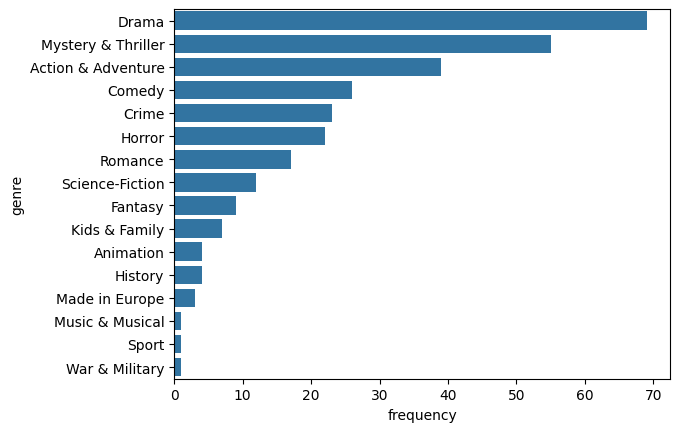

In [ ]:
sns.barplot(x = 'frequency', y = 'genre', data = movie_genres)



---
**The Top 5 genres for movies are(in that particular order):**


1.   Drama
2.   Mystery & Thriller
3.   Action & Adventure
4.   Comedy
5.   Horror
---





*The Movie Genres Wordcloud*

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

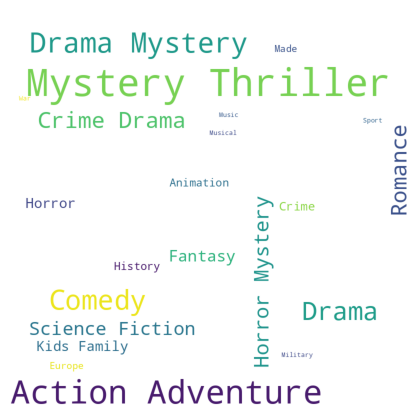

In [ ]:
movie_genres_wordcloud = WordCloud(width = 800, height = 800, background_color = 'white').generate(movie_genres_string)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(movie_genres_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**For Shows**

In [ ]:
show_genres_string = ', '.join(tv_shows['genre'])
show_genres_freq = [show_genres_string.count(genre) for genre in show_genres_list]
show_genres = pd.DataFrame({'genre' : show_genres_list, 'frequency' : show_genres_freq})
show_genres.sort_values(by = 'frequency', ascending = False, inplace = True)
show_genres

genre  frequency
5                Drama         82
11  Mystery & Thriller         49
0   Action & Adventure         37
3                Crime         36
2               Comedy         35
14     Science-Fiction         33
6              Fantasy         25
13             Romance         18
8               Horror         14
1            Animation         13
16      War & Military          4
7              History          4
9        Kids & Family          3
10      Made in Europe          3
4          Documentary          3
15               Sport          2
12          Reality TV          1
17             Western          1

*The Genres in Shows*

<Axes: xlabel='frequency', ylabel='genre'>

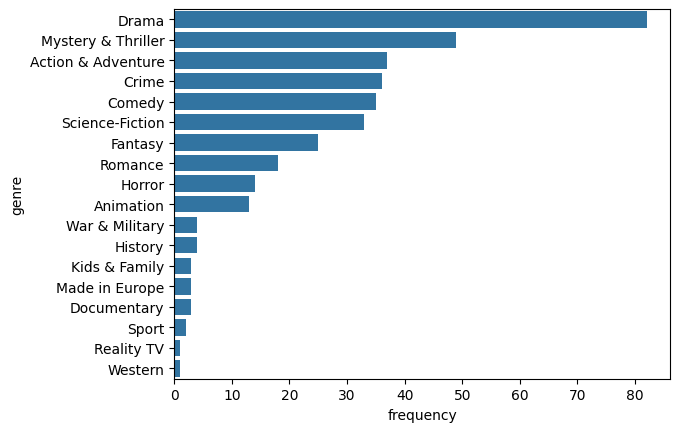

In [ ]:
sns.barplot(x = 'frequency', y = 'genre', data = show_genres)

---
**The Top 5 genres for tv shows are(in that particular order):**


1.   Drama
2.   Mystery & Thriller
3.   Crime
4.   Action & Adventure
5.   Comedy
---


*The Show Genres Wordcloud*

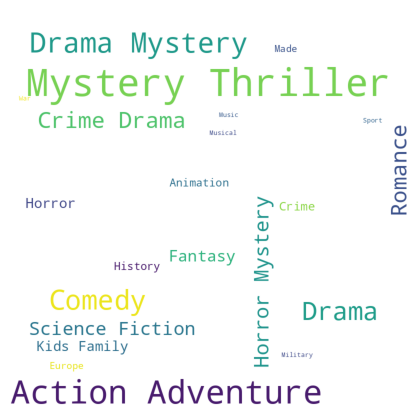

In [ ]:
show_genres_wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white').generate(show_genres_string)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(movie_genres_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## **Finding Predominant Streaming Service**

**For Movies**

In [ ]:
movie_strm_string = ', '.join(movies['streaming service'])
movie_strm_freq = [movie_strm_string.count(strm) for strm in movie_strm_services_list]
movie_streaming_services = pd.DataFrame({'streaming service' : movie_strm_services_list, 'frequency' : movie_strm_freq})
movie_streaming_services.sort_values(by = 'frequency', ascending = False, inplace = True)
movie_streaming_services

streaming service  frequency
2            Apple TV+        105
1   Amazon Prime Video         44
3           Bookmyshow         26
10             Netflix         22
5              Hotstar         12
7           Jio Cinema         11
15                Zee5         10
14    VI movies and tv          8
16                 aha          7
11            Sony Liv          4
12             Sun Nxt          3
8       Lionsgate Play          3
13           Tata Play          2
9          ManoramaMax          1
6         Hungama Play          1
4             FilmBox+          1
0     Amazon MX Player          1

*The Streaming Services for Movies*

<Axes: xlabel='frequency', ylabel='streaming service'>

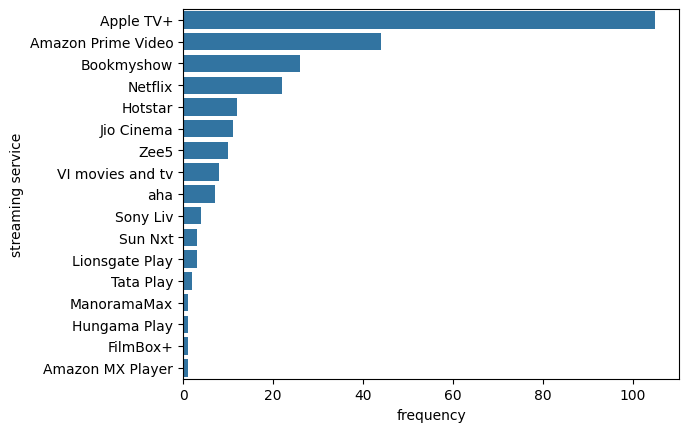

In [ ]:
sns.barplot(x = 'frequency', y = 'streaming service', data = movie_streaming_services)



---

**The Most Predominant Streaming Service for movies is Apple TV+.**

---

*The Wordcloud of streaming services for movies*

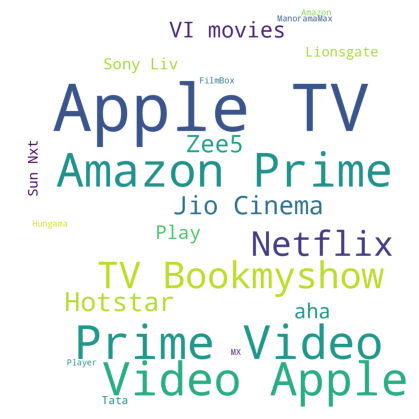

In [ ]:
movie_strm_wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white').generate(movie_strm_string)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(movie_strm_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

**For Shows**

In [ ]:
show_strm_string = ', '.join(tv_shows.loc[tv_shows['streaming service'].notna(),'streaming service'])
show_strm_freq = [show_strm_string.count(strm) for strm in show_stream_services_list]
show_strm_services = pd.DataFrame({'streaming service' : show_stream_services_list, 'frequency' : show_strm_freq})
show_strm_services.sort_values(by = 'frequency', ascending = False, inplace = True)
show_strm_services

streaming service  frequency
8              Netflix         35
2   Amazon Prime Video         34
5              Hotstar         17
6           Jio Cinema         16
4          Crunchyroll          5
11    VI movies and tv          5
12                Zee5          4
0           Alt Balaji          3
1     Amazon MX Player          3
3            Apple TV+          2
9             Sony Liv          2
7       Lionsgate Play          1
10             Sun Nxt          1

In [ ]:
tv_shows.loc[tv_shows['streaming service'].notna()].shape

(101, 9)

In [ ]:
show_strm_services.frequency.sum()

128

*The Streaming Services for Shows*

<Axes: xlabel='frequency', ylabel='streaming service'>

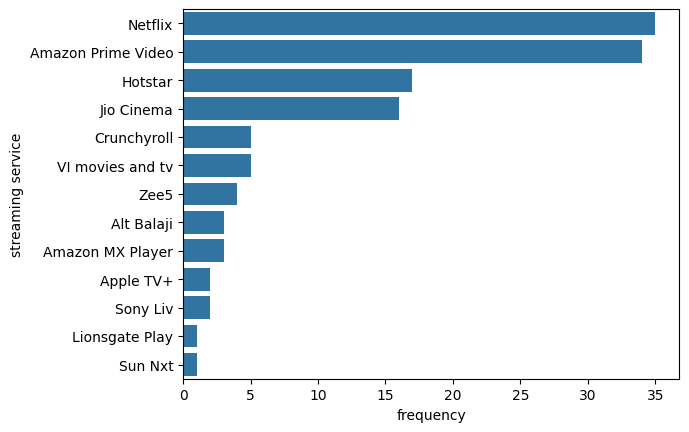

In [ ]:
sns.barplot(x = 'frequency', y = 'streaming service', data = show_strm_services)



---

**The Most Predominant Streaming Service for tv shows is Netflix.**

---

*The Wordcloud of Streaming Services for Shows*

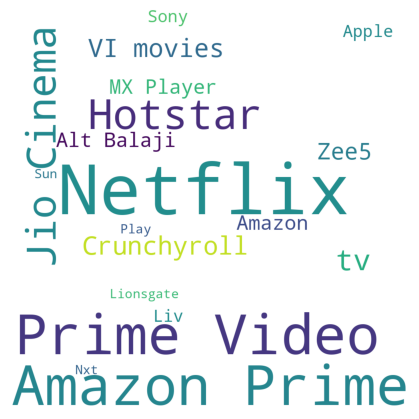

In [ ]:
show_strm_wordcloud = WordCloud(width = 1000, height = 1000, background_color = 'white').generate(show_strm_string)

plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(show_strm_wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#save_path = '/content/drive/MyDrive/Colab Notebooks/AlmaBetter/assignments/JustWatch assignment/'

In [ ]:
#saving final dataframe as Final Data in csv format
#movies.to_csv(save_path + 'Movies Data.csv', index = False)
#tv_shows.to_csv(save_path + 'TV Shows Data.csv', index = False)

In [ ]:
#saving filter data as Filter Data in csv format
#recent_movies.to_csv(save_path + 'Recent Movies Data.csv', index = False)
#recent_shows.to_csv(save_path + 'Recent TV Shows Data.csv', index = False)
#excelent_movies.to_csv(save_path + 'Excelent Movies Data.csv', index = False)
#excelent_shows.to_csv(save_path + 'Excelent TV Shows Data.csv', index = False)